In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import neighbors, linear_model, svm, ensemble, preprocessing, cross_validation

%matplotlib inline

Loading the data

In [82]:
train = pd.read_csv("../input/Iris_data.csv")
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_enc
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


The "Id" feature is unnecessary so we drop it.

In [83]:
train.drop(["Id"], axis=1, inplace = True)

Check for missing values

In [84]:
pd.DataFrame(train.isnull().sum(), columns=["Train Missing values"])

,Train Missing values
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


There are no missing values

We will encode the Species feature:

In [85]:
enc = preprocessing.LabelEncoder()
train["Species_enc"] = enc.fit_transform(train.Species)

In [86]:
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_enc
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


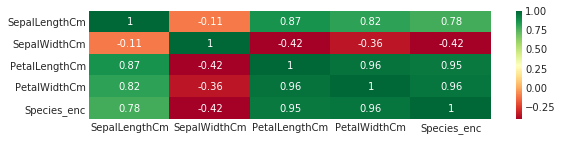

In [87]:
plt.figure(figsize=(9,2))
sns.heatmap(train.corr(), cmap="RdYlGn", annot=True)

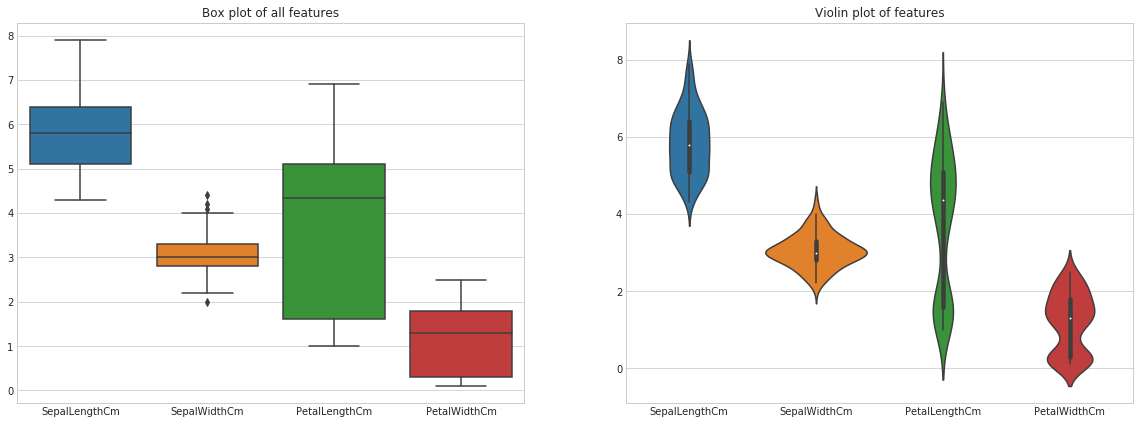

In [88]:
plt.figure(figsize=(20,7))

plt.subplot2grid((1,2), (0,0))
sns.set_style("whitegrid")
sns.boxplot(data = train.drop(["Species_enc"], 1))
plt.title("Box plot of all features")

plt.subplot2grid((1,2), (0,1))
sns.violinplot(data = train.drop(["Species_enc"], 1))
plt.title("Violin plot of features")

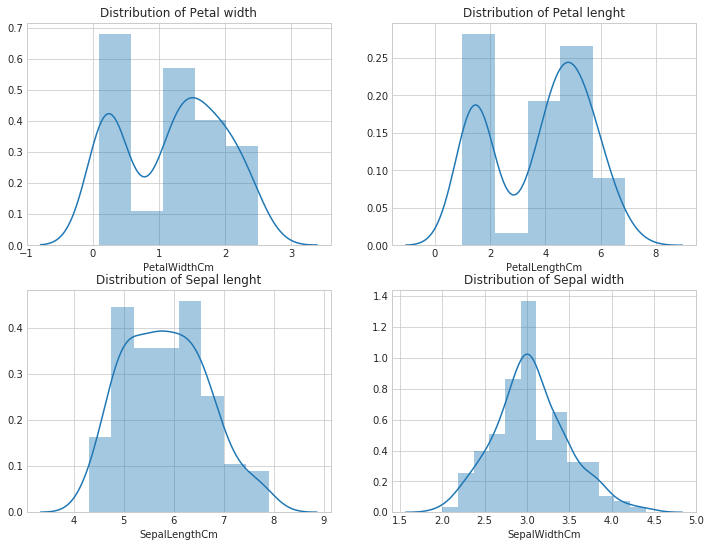

In [89]:
plt.figure(figsize=(12,9))

plt.subplot2grid((2,2),(0,0))
sns.distplot(a = train.PetalWidthCm)
plt.title("Distribution of Petal width")

plt.subplot2grid((2,2),(0,1))
sns.distplot(train.PetalLengthCm)
plt.title("Distribution of Petal lenght")

plt.subplot2grid((2,2),(1,0))
sns.distplot(train.SepalLengthCm)
plt.title("Distribution of Sepal lenght")

plt.subplot2grid((2,2),(1,1))
sns.distplot(train.SepalWidthCm)
plt.title("Distribution of Sepal width")

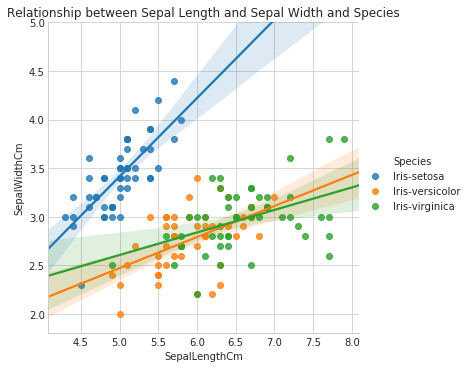

In [90]:
plt.figure(figsize=(10,8))
g = sns.lmplot(data = train, x="SepalLengthCm", y = "SepalWidthCm", hue = "Species")
g.set(ylim=(1.8,5))
plt.title("Relationship between Sepal Length and Sepal Width and Species")

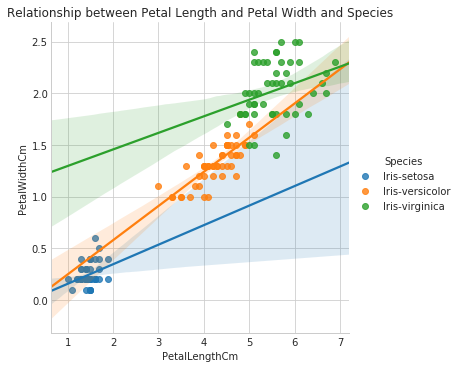

In [91]:
plt.figure(figsize=(15,7))
sns.lmplot(data = train, x="PetalLengthCm", y = "PetalWidthCm", hue = "Species")
plt.title("Relationship between Petal Length and Petal Width and Species")

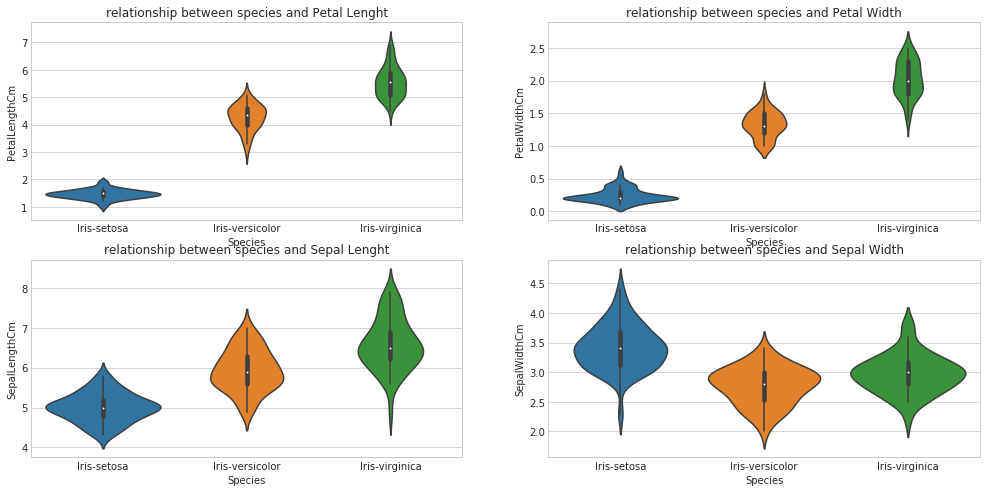

In [92]:
plt.figure(figsize=(17,8))


plt.subplot2grid((2,2),(0,0))
sns.violinplot(x= train.Species, y = train.PetalLengthCm)
plt.title("relationship between species and Petal Lenght")


plt.subplot2grid((2,2),(0,1))
sns.violinplot(x= train.Species, y = train.PetalWidthCm)
plt.title("relationship between species and Petal Width")


plt.subplot2grid((2,2),(1,0))
sns.violinplot(x= train.Species, y = train.SepalLengthCm)
plt.title("relationship between species and Sepal Lenght")


plt.subplot2grid((2,2),(1,1))
sns.violinplot(x= train.Species, y = train.SepalWidthCm)
plt.title("relationship between species and Sepal Width")

## Modeling :

In [95]:
x = train.drop(["Species", "Species_enc"], axis=1)
y = train["Species_enc"]
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y)




clf_knn = neighbors.KNeighborsClassifier()

clf_knn.fit(x_train, y_train)

score_knn = clf_knn.score(x_test, y_test)



clf_svc = svm.SVC()

clf_svc.fit(x_train, y_train)

score_svc = clf_svc.score(x_test, y_test)



clf_lgr = linear_model.LogisticRegression()

clf_lgr.fit(x_train, y_train)

score_lgr = clf_lgr.score(x_test, y_test)



clf_rdmfrst = ensemble.RandomForestClassifier()

clf_rdmfrst.fit(x_train, y_train)

score_rdmfrst = clf_rdmfrst.score(x_test, y_test)



clf_sgd = linear_model.SGDClassifier()

clf_sgd.fit(x_train, y_train)

score_sgd = clf_sgd.score(x_test, y_test)





scores = [score_knn, score_lgr, score_rdmfrst, score_sgd, score_svc]

clf_names = ["K nearest neighbors", "Logistic regression", "Random forrest", "Stochastic gradient descent", 
             "Support vector classifier"]

clf_scores = pd.DataFrame({"Algorithms": clf_names, "Scores": scores} )

clf_scores.sort_values(by=["Scores"], ascending=False, inplace=True)

clf_scores

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


,Algorithms,Scores
0,K nearest neighbors,1.000000
2,Random forrest,1.000000
4,Support vector classifier,1.000000
1,Logistic regression,0.973684
3,Stochastic gradient descent,0.605263
